In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sb
import plotly_express as px

In [2]:
#importing cleaned player data

df = pd.read_csv('clean_data.csv')
df

,allInPings,assistMePings,assists,baitPings,baronKills,basicPings,bountyLevel,champExperience,champLevel,championId,championName,championTransform,commandPings,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,dangerPings,deaths,detectorWardsPlaced,doubleKills,dragonKills,eligibleForProgression,enemyMissingPings,enemyVisionPings,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,getBackPings,goldEarned,goldSpent,holdPings,individualPosition,inhibitorKills,inhibitorTakedowns,inhibitorsLost,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,killingSprees,kills,lane,largestCriticalStrike,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,needVisionPings,neutralMinionsKilled,nexusKills,nexusLost,nexusTakedowns,objectivesStolen,objectivesStolenAssists,onMyWayPings,participantId,pentaKills,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,playerAugment1,playerAugment2,playerAugment3,playerAugment4,playerSubteamId,profileIcon,pushPings,puuid,quadraKills,riotIdName,riotIdTagline,role,sightWardsBoughtInGame,spell1Casts,spell2Casts,spell3Casts,spell4Casts,subteamPlacement,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerId,summonerLevel,summonerName,teamEarlySurrendered,teamId,teamPosition,timeCCingOthers,timePlayed,totalAllyJungleMinionsKilled,totalDamageDealt,totalDamageDealtToChampions,totalDamageShieldedOnTeammates,totalDamageTaken,totalEnemyJungleMinionsKilled,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,totalUnitsHealed,tripleKills,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,visionClearedPings,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,challenges.12AssistStreakCount,challenges.abilityUses,challenges.acesBefore15Minutes,challenges.alliedJungleMonsterKills,challenges.baronBuffGoldAdvantageOverThreshold,challenges.baronTakedowns,challenges.blastConeOppositeOpponentCount,challenges.bountyGold,challenges.buffsStolen,challenges.completeSupportQuestInTime,challenges.controlWardTimeCoverageInRiverOrEnemyHalf,challenges.controlWardsPlaced,challenges.damagePerMinute,challenges.damageTakenOnTeamPercentage,challenges.dancedWithRiftHerald,challenges.deathsByEnemyChamps,challenges.dodgeSkillShotsSmallWindow,challenges.doubleAces,challenges.dragonTakedowns,challenges.earliestBaron,challenges.earlyLaningPhaseGoldExpAdvantage,challenges.effectiveHealAndShielding,challenges.elderDragonKillsWithOpposingSoul,challenges.elderDragonMultikills,challenges.enemyChampionImmobilizations,challenges.enemyJungleMonsterKills,challenges.epicMonsterKillsNearEnemyJungler,challenges.epicMonsterKillsWithin30SecondsOfSpawn,challenges.epicMonsterSteals,challenges.epicMonsterStolenWithoutSmite,challenges.firstTurretKilled,challenges.flawlessAces,challenges.fullTeamTakedown,challenges.gameLength,challenges.getTakedownsInAllLanesEarlyJungleAsLaner,challenges.goldPerMinute,challenges.hadOpenNexus,challenges.immobilizeAndKillWithAlly,challenges.initialBuffCount,challenges.initialCrabCount,challenges.jungleCsBefore10Minutes,challenges.junglerTakedownsNearDamagedEpicMonster,challenges.kTurretsDestroyedBeforePlatesFall,challenges.kda,challenges.killAfterHiddenWithAlly,challenges.killParticipation,challenges.killedChampTookFullTeamDamageSurvived,challenges.killingSprees,challenges.killsNearEnemyTurret,challenges.killsOnOtherLanesEarlyJungleAsLaner,challenges.killsOnRecentlyHealedByAramPack,challenges.killsUnderOwnTurret,challenges.killsWithHelpFromEpicMonster,challenges.knockEnemyIntoTeamAndKill,challenges.landSkillShotsEarlyGame,challenges.laneMinionsFirst10Minutes,challenges.laningPhaseGoldExpAdvantage,challenges.legendaryCount,challenges.lostAnInhibitor,challenges.maxCsAdvantageOnLaneOpponent,challenges.maxKillDeficit,ch

In [3]:
#changing teamId to string for aggregating purposes
df['teamId'] = df['teamId'].apply(lambda x: 'Blue' if x == 100 else 'Red')

-dimensionally speaking, the size of this data is huge and even after removing all the id columns we would still be left with something in the region of 250-260 columns and this speaks to the amount of data the game captures espcially so when looking at the "challenges" columns

-due to the nature of the game, the data reflected in these features can relate to each other in a way that makes it almost impossible to separate, a "kill" is not just the money generated which is reflected in "goldEarned" but its also the "Minions" denied to the opponent, the "champExperience" lost and this barely scratches the surface of how these features may relate to each other 

-this analysis is limited only to those plyers of "master" rank and therefore any findings or outcomes apply only to this subset of players

Text(0.5, 1.0, 'Average Number of [Team] kills')

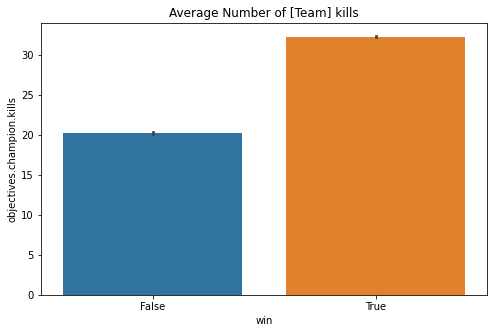

In [4]:
plt.figure(figsize=(8,5))
sb.barplot(x=df['win'],y=df['objectives.champion.kills'])
plt.title('Average Number of [Team] kills')

-"kills" are the one of the core features of this data, the chances of witnessing a team that lost with the higher amount of kills is very low

In [5]:
#testing for Probability of seeing higher values of "kills" in win/lose "P(X>Y) =! P(X<Y)"
from scipy.stats import mannwhitneyu
mannwhitneyu(x=df[df['win']==True]['objectives.champion.kills'],
            y=df[df['win']==False]['objectives.champion.kills'],
            )

MannwhitneyuResult(statistic=1360545362.5, pvalue=0.0)

with a such a huge amount of data any appropriate test would give me a p-value < 0.05 and therefore going forward i will use graphs only to visualize the effect size

## Team Objectives
to summarize team objective statistics

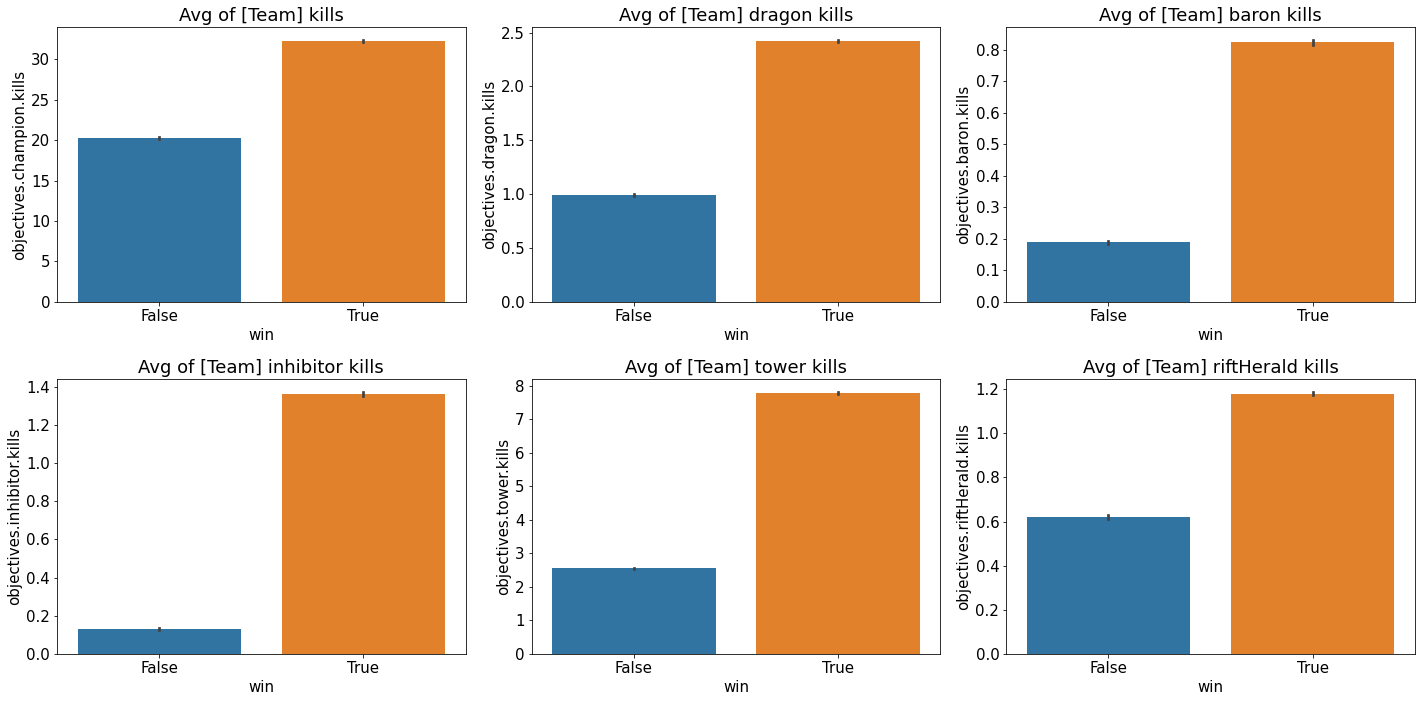

In [8]:

#figure grid of 1 row and 5 columns
plt.rcParams['font.size'] = 15
fig, axes = plt.subplots(2,3, figsize=(20, 10))

#Avg team kills for winning/losing teams

sb.barplot(x=df['win'],y=df['objectives.champion.kills'], ax=axes[0,0])
axes[0,0].set_title('Avg of [Team] kills')

#Avg Dragon kills for winning/losing teams
sb.barplot(x=df['win'],y=df['objectives.dragon.kills'],ax=axes[0,1])
axes[0,1].set_title('Avg of [Team] dragon kills')

#Avg baron kills for winning/losing teams
sb.barplot(x=df['win'],y=df['objectives.baron.kills'],ax=axes[0,2])
axes[0,2].set_title('Avg of [Team] baron kills')

#Avg inhibitor kills for winning/losing teams
sb.barplot(x=df['win'],y=df['objectives.inhibitor.kills'],ax=axes[1,0])
axes[1,0].set_title('Avg of [Team] inhibitor kills')

#Avg tower kills for winning/losing teams
sb.barplot(x=df['win'],y=df['objectives.tower.kills'],ax=axes[1,1])
axes[1,1].set_title('Avg of [Team] tower kills')

#Avg herald kills for winning/losing teams
sb.barplot(x=df['win'],y=df['objectives.riftHerald.kills'],ax=axes[1,2])
axes[1,2].set_title('Avg of [Team] riftHerald kills')


plt.tight_layout()
plt.show()

-objectives in league of legends are the driving force behind the game, the main goal of the match is to reach the enemy's nexus and destroy it and to that end players seek to claim objectives in the match to get ahead.

-in a way, each objective contributes to the odds of winning but also it contributes to the odds of claiming other objectives so the team that can hold advantage over the other earlier is most likely to "snowball" to victory.

-true to its name the snowballing effect in league, especially so in "master" rank matches is very integral to the outcome of the game as players in these games rarely make mistakes and therefore every mistake committed contributes greatly to this effect.

-as mentioned before a single "kill" is not just the "gold" it generates its also the time,exp and minions denied to the opponent, these factors can cascade very quickly especially so in the hands of player who know how to utilize it, which in our case the segment of our analysis.


### to summarize

-in league of legends, especially so in the master league games the true difference between winning and losing is one's ability/team's ability to capitalize on the mistakes of their opponents, this is what i seek to emphasize on in this EDA.


### the objective

-to establish a relation between the winning/losing teams statistics game-wide and challenges up to the respective intervals they log, to show that one can tell with a high degree of a confidence the outcome of a game based on status of the teams at these intervals.


### the limitation

-to observe the true snowball effect(or rather the emergence of it) data captured at the earliest intervals of the game is needed to observe such effect, however since most of the data is captured game wide i will limit the scope of this analysis to a subset of the "challenges" columns that contains data logged for 7/10/15 minutes of the game and "first" team objectives.

-since these stats are also impacted by game duration, i have limited my analysis to games that last more than 15 minutes as any less than that defeats the purposes of analysis
